In [1]:
# Importing required modules
import pandas as pd          
import numpy as np               # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
import datetime as dt
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 

import warnings                   # To ignore the warnings 
warnings.filterwarnings("ignore")


# Settings for pretty nice plots
plt.style.use('fivethirtyeight')
plt.show()



# A first look at Maruti’s stock Prices
Let’s look at the first few columns of the dataset:

In [2]:
df = pd.read_csv(r'C:\Users\PREETI\Downloads\MARUTI.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2003-07-09,MARUTI,EQ,125.00,164.90,170.40,155.00,164.0,164.30,165.95,35164283,5.835528e+14,NaN,8537695.0,0.2428
1,2003-07-10,MARUTI,EQ,164.30,167.00,168.70,164.50,167.0,167.00,166.74,10464179,1.744820e+14,NaN,4363947.0,0.4170
2,2003-07-11,MARUTI,EQ,167.00,167.75,174.85,166.25,173.6,173.35,172.45,11740117,2.024622e+14,NaN,3014852.0,0.2568
3,2003-07-14,MARUTI,EQ,173.35,174.25,179.25,174.25,178.6,177.95,177.91,5982324,1.064313e+14,NaN,1949217.0,0.3258
4,2003-07-15,MARUTI,EQ,177.95,200.00,200.00,173.00,176.3,176.20,176.88,6173689,1.092001e+14,NaN,1307694.0,0.2118


In [3]:
# taking limited the number of columns to keep things simple. 

data = df[['Date','Open','High','Low','Close','Volume','VWAP']]


Let us now look at the datatypes of the various components.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4098 entries, 0 to 4097
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4098 non-null   object 
 1   Open    4098 non-null   float64
 2   High    4098 non-null   float64
 3   Low     4098 non-null   float64
 4   Close   4098 non-null   float64
 5   Volume  4098 non-null   int64  
 6   VWAP    4098 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 224.2+ KB


It appears that the Date column is being treated as a string rather than as dates. To fix this, we’ll use the pandas `to_datetime()` feature which converts the arguments to dates.

In [5]:
# Convert string to datetime64
data['Date'] = data['Date'].apply(pd.to_datetime)
data.head()

,Date,Open,High,Low,Close,Volume,VWAP
0,2003-07-09,164.90,170.40,155.00,164.30,35164283,165.95
1,2003-07-10,167.00,168.70,164.50,167.00,10464179,166.74
2,2003-07-11,167.75,174.85,166.25,173.35,11740117,172.45
3,2003-07-14,174.25,179.25,174.25,177.95,5982324,177.91
4,2003-07-15,200.00,200.00,173.00,176.20,6173689,176.88


Now that our data has been converted into the desired format, let’s take a look at its various columns for further analysis.      

* **The Open and Close columns** indicate the opening and closing price of the stocks on a particular day.
* **The High and Low columns** provide the highest and the lowest price for the stock on a particular day, respectively.
* **The Volume column** tells us the total volume of stocks traded on a particular day.

The **volume weighted average price (VWAP)** is a trading benchmark used by traders that gives the average price a security has traded at throughout the day, based on both volume and price. It is important because it provides traders with insight into both the trend and value of a security.[source](https://www.investopedia.com/terms/v/vwap.asp).

#### Pandas for time series analysis
As pandas was developed in the context of financial modeling.
#### Manipulating datetime
Python's basic objects for working with dates and times reside in the built-in `datetime` module. In pandas, a single point in time is represented as a `Timestamp` and we can use `datetime()` function to create Timestamps from strings in a wide variety of date/time formats.

In [6]:
from datetime import datetime
my_year = 2019
my_month = 4
my_day = 21
my_hour = 10
my_minute = 5
my_second = 30

We can now create a datetime object, and use it freely with pandas given the above attributes.

In [7]:
test_date = datetime(my_year, my_month, my_day)
test_date


datetime.datetime(2019, 4, 21, 0, 0)

For the purposes of analyzing our particular data, we have selected only the day, month and year, but we could also include more details like hour, minute and second if necessary. 

In [8]:
test_date = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
print('The day is : ', test_date.day)
print('The hour is : ', test_date.hour)
print('The month is : ', test_date.month)

The day is :  21
The hour is :  10
The month is :  4


For our stock price dataset, the type of the index column is DatetimeIndex. We can use pandas to obtain the minimum and maximum dates in the data.

In [9]:
print(data.index.max())
print(data.index.min())

4097
0


We can also calculate the latest date location and the earliest date index location as follows:

In [10]:
# Earliest date index location
print('Earliest date index location is: ',data.index.argmin())

# Latest date location
print('Latest date location: ',data.index.argmax())


Earliest date index location is:  0
Latest date location:  4097


## Feature Extraction

Let's extract time and date features from the Date column. Since the **volume weighted average price** (VWAP) is a trading benchmark, we shall limit our analysis to only that column.

In [11]:
df_vwap = df[['Date','VWAP']]
df_vwap['Date'] = df_vwap['Date'].apply(pd.to_datetime)
df_vwap.head()

,Date,VWAP
0,2003-07-09,165.95
1,2003-07-10,166.74
2,2003-07-11,172.45
3,2003-07-14,177.91
4,2003-07-15,176.88


Let's extract the year, month, day, day of the week from the Date column.

**Note - 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.**


In [12]:
df_vwap['year'] = df_vwap.Date.dt.year
df_vwap['month'] = df_vwap.Date.dt.month
df_vwap['day'] = df_vwap.Date.dt.day
df_vwap['day of week'] = df_vwap.Date.dt.dayofweek

#Set Date column as the index column.
df_vwap.set_index('Date', inplace=True)
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,165.95,2003,7,9,2
2003-07-10,166.74,2003,7,10,3
2003-07-11,172.45,2003,7,11,4
2003-07-14,177.91,2003,7,14,0
2003-07-15,176.88,2003,7,15,1


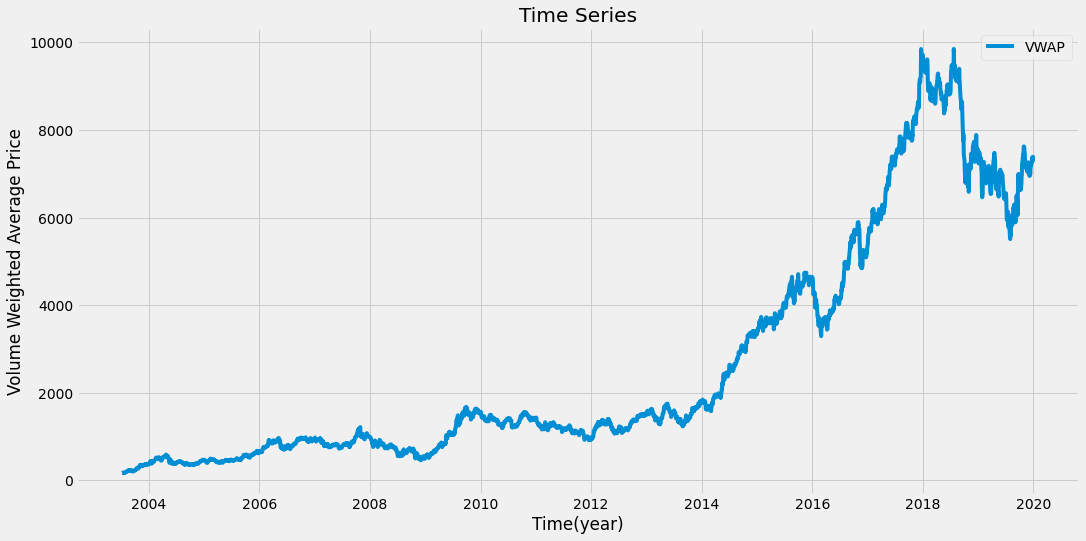

In [13]:
# Visualising the VWAP 

plt.figure(figsize=(16,8)) 
plt.plot(df_vwap['VWAP'], label='VWAP') 
plt.title('Time Series') 
plt.xlabel("Time(year)") 
plt.ylabel("Volume Weighted Average Price") 
plt.legend(loc='best')

It appears that Maruti had a more or less steady increase in its stock price over the from 2004 to the mid of 2018 window.There appears to be some drop in 2019 though.  We’ll now use pandas to analyze and manipulate this data to gain insights.

## Exploratory Data Analysis

Let's explore the data and look at details at year, month and day level

<AxesSubplot:xlabel='year'>

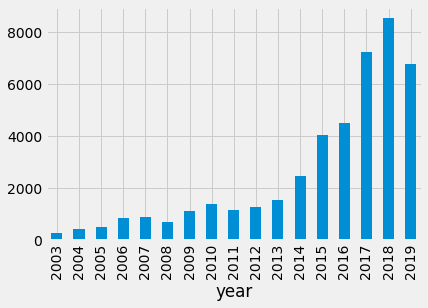

In [14]:
# Yearly VWAP of Maruti Stocks

df_vwap.groupby('year')['VWAP'].mean().plot.bar()

There is a continuos increase in the VWAP price till 2018 and a certain dip in 2019. Now, let's analyse the data month wise

<AxesSubplot:xlabel='month'>

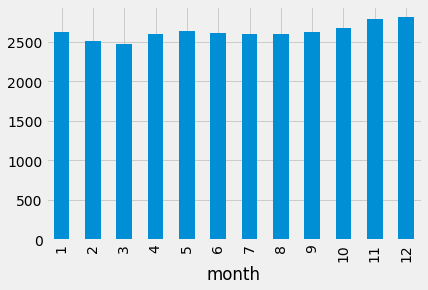

In [15]:
# Monthly VWAP of Maruti Stocks

df_vwap.groupby('month')['VWAP'].mean().plot.bar()

no major difference in between different months

<AxesSubplot:xlabel='day'>

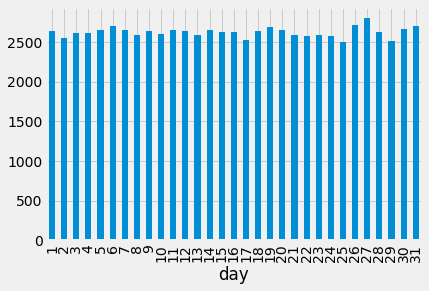

In [16]:
# Daily VWAP of Maruti Stocks

df_vwap.groupby('day')['VWAP'].mean().plot.bar()

Again, all days of the month have somewhat similar outcomes

<AxesSubplot:xlabel='day of week'>

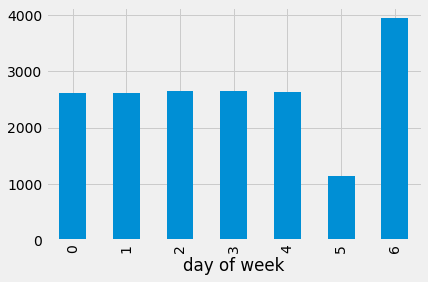

In [17]:
# Analysing w.r.t day of the week

df_vwap.groupby('day of week')['VWAP'].mean().plot.bar()

This is somewhat strange. While the activity is almost similar from Monday to Friday, Sunday shows a sudden spike in the VWAP price. This means although stockmarkets are closed on weekends, but when they were open, there were huge transactions on those days.

## Time resampling
Examining stock price data for every single day isn’t of much use to financial institutions, who are more interested in spotting market trends. To make it easier, we using a process called time resampling to aggregate data into a defined time period, such as by month or by quarter. Institutions can then see an overview of stock prices and make decisions according to these trends.           

The pandas library has a `resample()` function which resamples such time series data. The resample method in pandas is similar to its `groupby` method as it is essentially grouping according to a certain time span. The `resample()` function looks like this:

In [18]:
df_vwap.resample(rule = 'A').mean()[:5]

,VWAP,year,month,day,day of week
Date,,,,,
2003-12-31,266.608468,2003.0,9.604839,16.298387,2.016129
2004-12-31,430.522835,2004.0,6.559055,15.708661,2.047244
2005-12-31,494.328566,2005.0,6.541833,15.733068,2.000000
2006-12-31,845.582160,2006.0,6.552000,15.976000,2.056000
2007-12-31,887.107871,2007.0,6.554217,15.843373,1.987952


> **To summarize what happened above:**
>
>  * `data.resample()` is used to resample the stock data.
>  * The ‘**A**’ stands for year-end frequency, and denotes the offset values by which we want to resample the data.
>  * `mean()` indicates that we want the average stock price during this period.

Below is a complete list of the offset values. The list can also be found in the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).

![](https://cdn-images-1.medium.com/max/800/1*piQRFEDprVNqznejGotpcw.png)

We can also use time sampling to plot charts for specific columns.

Text(0.5, 1.0, 'Yearly Mean VWAP for Maruti')

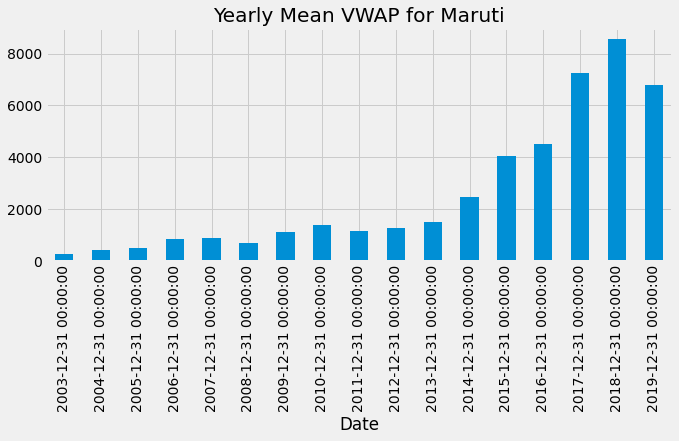

In [19]:
df_vwap['VWAP'].resample('Y').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly Mean VWAP for Maruti')


The above bar plot corresponds to Maruti’s VWAP at year-end for each year in our data set. 

Similarly, year start mean VWAP can be found below. 

Text(0.5, 1.0, 'Yearly start Mean VWAP for Maruti')

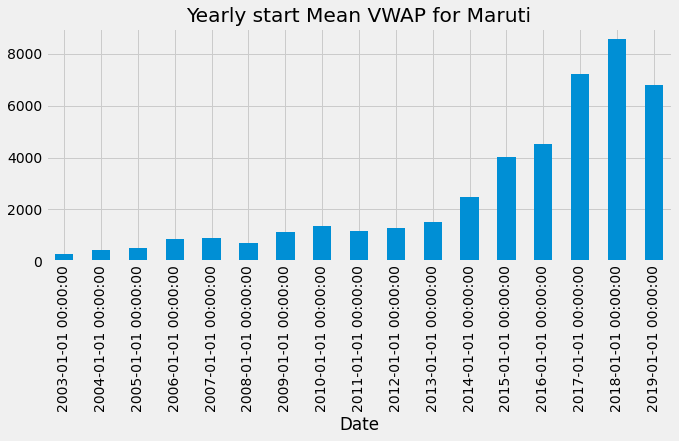

In [20]:
df_vwap['VWAP'].resample('AS').mean().plot(kind='bar',figsize = (10,4))
plt.title('Yearly start Mean VWAP for Maruti')


## Time Shifting

Sometimes, we may need to shift or move the data forward or backwards in time. This shifting is done along a time index by the desired number of time-frequency increments.Here is the original dataset before any time shifts.

In [21]:
df_vwap.head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,165.95,2003,7,9,2
2003-07-10,166.74,2003,7,10,3
2003-07-11,172.45,2003,7,11,4
2003-07-14,177.91,2003,7,14,0
2003-07-15,176.88,2003,7,15,1


## Forward Shifting
To shift our data forward, we will pass the desired number of periods (or increments) through the shift() function, which needs to be positive value in this case. Let's move our data forward by one period or index, which means that all values which earlier corresponded to row N will now belong to row N+1. Here is the output: 


In [22]:
df_vwap.shift(1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,NaN,NaN,NaN,NaN,NaN
2003-07-10,165.95,2003.0,7.0,9.0,2.0
2003-07-11,166.74,2003.0,7.0,10.0,3.0
2003-07-14,172.45,2003.0,7.0,11.0,4.0
2003-07-15,177.91,2003.0,7.0,14.0,0.0


## Backwards shifting
To shift our data backwards, the number of periods (or increments) must be negative.

In [23]:
df_vwap.shift(-1).head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,166.74,2003.0,7.0,10.0,3.0
2003-07-10,172.45,2003.0,7.0,11.0,4.0
2003-07-11,177.91,2003.0,7.0,14.0,0.0
2003-07-14,176.88,2003.0,7.0,15.0,1.0
2003-07-15,177.59,2003.0,7.0,16.0,2.0


The opening amount corresponding to **2003-07-09** is now **167**, whereas originally it was **164.90**.

## Shifting based off time string code
We can also use the offset from the offset table for time shifting. For that, we will use the pandas `shift()` function. We only need to pass in the `periods` and `freq` parameters. The `period` attribute defines the number of steps to be shifted, while the `freq` parameters denote the size of those steps.

Let’s say we want to shift the data three months forward:

In [24]:
df_vwap.tshift(periods=3, freq = 'M').head()

,VWAP,year,month,day,day of week
Date,,,,,
2003-09-30,165.95,2003,7,9,2
2003-09-30,166.74,2003,7,10,3
2003-09-30,172.45,2003,7,11,4
2003-09-30,177.91,2003,7,14,0
2003-09-30,176.88,2003,7,15,1


## Rolling windows

Time series data can be noisy due to high fluctuations in the market. As a result, it becomes difficult to gauge a trend or pattern in the data. Here is a visualization of the Amazon’s adjusted close price over the years where we can see such noise:  

<AxesSubplot:xlabel='Date'>

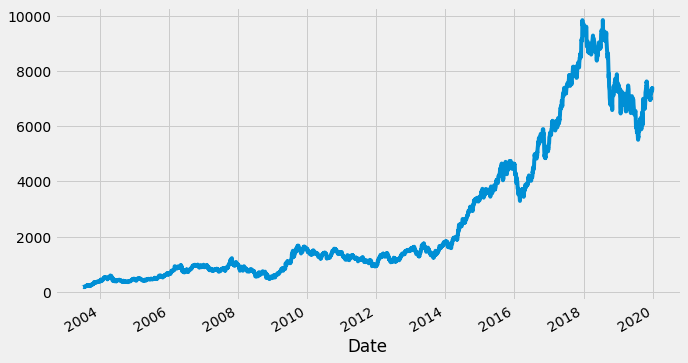

In [25]:
df_vwap['VWAP'].plot(figsize = (10,6))

As we’re looking at daily data, there’s quite a bit of noise present. It would be nice if we could average this out by a week, which is where a rolling mean comes in. A rolling mean, or moving average, is a transformation method which helps average out noise from data. It works by simply splitting and aggregating the data into windows according to function, such as `mean()`, `median()`, `count()`, etc. For this example, we’ll use a rolling mean for 7 days.

In [26]:
df_vwap.rolling(7).mean().head(10)

,VWAP,year,month,day,day of week
Date,,,,,
2003-07-09,NaN,NaN,NaN,NaN,NaN
2003-07-10,NaN,NaN,NaN,NaN,NaN
2003-07-11,NaN,NaN,NaN,NaN,NaN
2003-07-14,NaN,NaN,NaN,NaN,NaN
2003-07-15,NaN,NaN,NaN,NaN,NaN
2003-07-16,NaN,NaN,NaN,NaN,NaN
2003-07-17,173.285714,2003.0,7.0,13.142857,2.142857
2003-07-18,173.530000,2003.0,7.0,14.428571,2.428571
2003-07-21,173.520000,2003.0,7.0,16.000000,2.000000


The first six values have all become blank as there wasn’t enough data to actually fill them when using a window of seven days.      

So, what are the key benefits of calculating a moving average or using this rolling mean method? Our data becomes a lot less noisy and more reflective of the trend than the data itself. Let’s actually plot this out. First, we’ll plot the original data followed by the rolling data for 30 days.     

<AxesSubplot:xlabel='Date'>

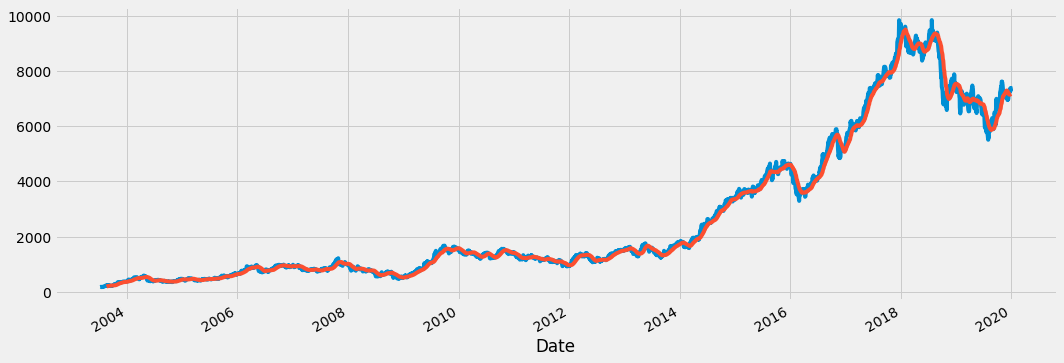

In [27]:
df_vwap['VWAP'].plot()
df_vwap.rolling(window=30).mean()['VWAP'].plot(figsize=(16, 6))